In [1]:
# by Terry Zhang in Mystic coders

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
year1 = pd.read_csv('compare_year_your_1.csv', low_memory=False)
year2 = pd.read_csv('compare_year_your_2.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [4]:
year1['DY'] = pd.to_numeric(year1['DY'])
year2['DY'] = pd.to_numeric(year2['DY'])
year1['MO'] = pd.to_numeric(year1['MO'])
year2['MO'] = pd.to_numeric(year2['MO'])
year1['mean_kilowatt_per_hour'] = pd.to_numeric(year1['mean_kilowatt_per_hour'])
year2['mean_kilowatt_per_hour'] = pd.to_numeric(year2['mean_kilowatt_per_hour'])

In [5]:
sub1 = year1[['DY', 'MO', 'mean_kilowatt_per_hour']].replace(-999, np.nan)
sub2 = year2[['DY', 'MO', 'mean_kilowatt_per_hour']].replace(-999, np.nan)
sub1 = sub1.dropna(subset=['mean_kilowatt_per_hour'])
sub2 = sub2.dropna(subset=['mean_kilowatt_per_hour'])

In [6]:
sub2 = sub2.rename(columns={"mean_kilowatt_per_hour": "mean_kilowatt_per_hour_2"})
sub1['kilowatt_per_day'] = (sub1['mean_kilowatt_per_hour']*24)
sub2['kilowatt_per_day_2'] = (sub2['mean_kilowatt_per_hour_2']*24)

In [7]:
g1 = sub1.groupby(pd.Index(sub1['MO']))['kilowatt_per_day'].mean()
g2 = sub2.groupby(pd.Index(sub2['MO']))['kilowatt_per_day_2'].mean()

In [8]:
sub3 = pd.concat([g1,g2], axis=1)

In [9]:
year1_name = year1.loc[1, 'YEAR']
year2_name = year2.loc[1, 'YEAR']

Text(0.5, 1.0, 'Box Plot for Your solar system output in kW-day for year 2020')

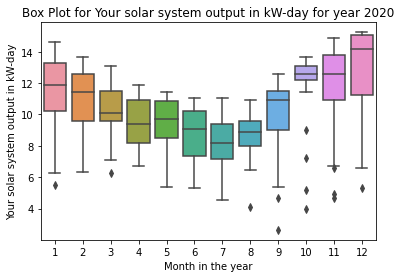

In [10]:
%matplotlib inline
sns.boxplot(data = sub1, x='MO',y='kilowatt_per_day')
plt.xlabel('Month in the year')
plt.ylabel('Your solar system output in kW-day')
plt.title(f'Box Plot for Your solar system output in kW-day for year {year1_name}')

Text(0.5, 1.0, 'Box Plot for Your solar system output in kW-day for year 2019')

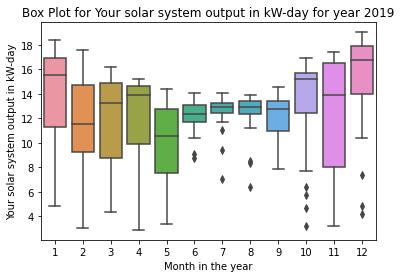

In [11]:
%matplotlib inline
sns.boxplot(data = sub2, x='MO',y='kilowatt_per_day_2')
plt.xlabel('Month in the year')
plt.ylabel('Your solar system output in kW-day')
plt.title(f'Box Plot for Your solar system output in kW-day for year {year2_name}')

Text(0.5, 1.0, 'Line Plot for comparsion of your solar panel system output')

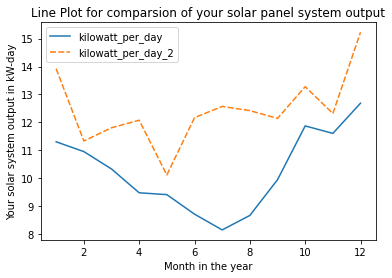

In [12]:
%matplotlib inline
sns.lineplot(data=sub3)
plt.xlabel('Month in the year')
plt.ylabel('Your solar system output in kW-day')
plt.title('Line Plot for comparsion of your solar panel system output')

In [13]:
monthly_mean = sub3['kilowatt_per_day'].mean()
monthly_max = sub3['kilowatt_per_day'].max()
monthly_min = sub3['kilowatt_per_day'].min()
monthly_total = sub3['kilowatt_per_day'].sum()
monthly_mean_2 = sub3['kilowatt_per_day_2'].mean()
monthly_max_2 = sub3['kilowatt_per_day_2'].max()
monthly_min_2 = sub3['kilowatt_per_day_2'].min()
monthly_total_2 = sub3['kilowatt_per_day_2'].sum()

In [14]:
print(f'For month {year1_name}:')
print(f'The mean of your solar system output in the year is {monthly_mean:.2f} kW-day')
print(f'The maxmium of your solar system output in the year is {monthly_max:.2f} kW-/day')
print(f'The minimum of your solar system output in the year is {monthly_min:.2f} kW-day')
print(f'The total of your solar system output in the year is {monthly_total:.2f} kW-day')

For month 2020:
The mean of your solar system output in the year is 10.26 kW-day
The maxmium of your solar system output in the year is 12.69 kW-/day
The minimum of your solar system output in the year is 8.16 kW-day
The total of your solar system output in the year is 123.18 kW-day


In [15]:
print(f'For month {year2_name}:')
print(f'The mean of your solar system output in the year is {monthly_mean:.2f} kW-day')
print(f'The maxmium of your solar system output in the year is {monthly_max:.2f} kW-/day')
print(f'The minimum of your solar system output in the year is {monthly_min:.2f} kW-day')
print(f'The total of your solar system output in the year is {monthly_total:.2f} kW-day')

For month 2019:
The mean of your solar system output in the year is 10.26 kW-day
The maxmium of your solar system output in the year is 12.69 kW-/day
The minimum of your solar system output in the year is 8.16 kW-day
The total of your solar system output in the year is 123.18 kW-day
